In [4]:
import scipy
from scipy.sparse import issparse
import numpy
import matplotlib
import pandas
import sklearn
import pydot
import h5py

import tensorflow
import keras


print('scipy ' + scipy.__version__)
print('numpy ' + numpy.__version__)
print('matplotlib ' + matplotlib.__version__)
print('pandas ' + pandas.__version__)
print('sklearn ' + sklearn.__version__)
print('h5py ' + h5py.__version__)

print('tensorflow ' + tensorflow.__version__)
print('keras ' + keras.__version__)

scipy 1.3.2
numpy 1.18.1
matplotlib 3.1.1
pandas 0.25.3
sklearn 0.22.1
h5py 2.9.0
tensorflow 1.14.0
keras 2.3.1


Using TensorFlow backend.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

import os
import shutil

base_dir = 'C:/Users/ICT01_01/PycharmProjects/dog breed'
img_dir = 'C:/Users/ICT01_01/PycharmProjects/dog breed/닥스훈트 프로필'

base_dir1 ='C:/Users/ICT01_01/Documents/1_project'
img_dir1 = 'C:/Users/ICT01_01/Documents/1_project/husky'

print(len(os.listdir(img_dir)))
print(len(os.listdir(img_dir1)))

536
502


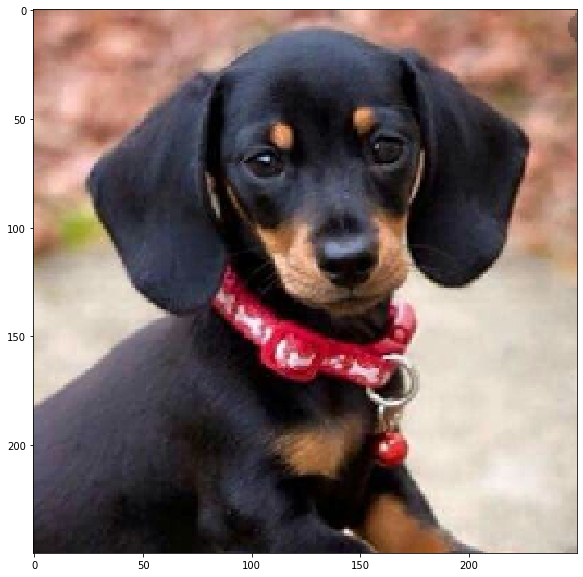

In [8]:
img_name = 'dachs219.jpg'
img_path = os.path.join(img_dir, img_name)

from keras.preprocessing import image

img = image.load_img(img_path, target_size = (250, 250))
img_tensor = image.img_to_array(img)

img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor.shape

img_tensor/=255.


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)

plt.imshow(img_tensor[0])
plt.show()

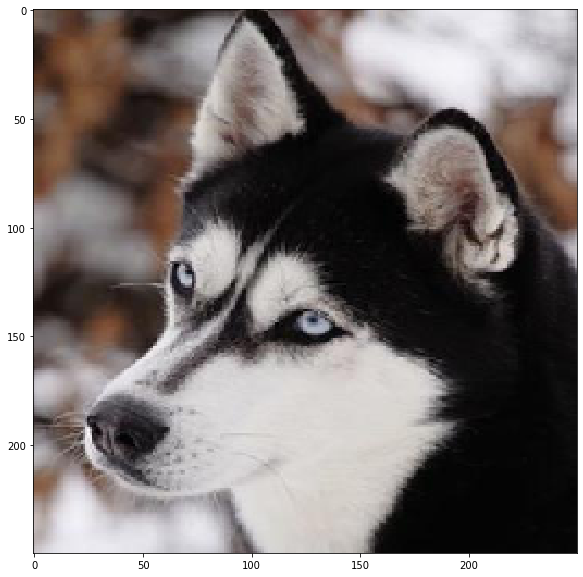

In [12]:
img_name1 = 'husky219.jpg'
img_path1 = os.path.join(img_dir1, img_name1)

from keras.preprocessing import image

img = image.load_img(img_path1, target_size = (250, 250))
img_tensor = image.img_to_array(img)

img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor.shape

img_tensor/=255.


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)

plt.imshow(img_tensor[0])
plt.show()

In [13]:
def preprocess_img(img_path, target_size = 100):
    from keras.preprocessing import image
    
    img = image.load_img(img_path, target_size = (target_size, target_size))
    img_tensor = image.img_to_array(img)
    
    img_tensor = np.expand_dims(img_tensor, axis = 0)
    
    img_tensor /= 255.
    
    return img_tensor

In [ ]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = "C:/Users/ICT01_01/Documents/1_project"
categories = ["dach", "husky","beggle","corgi","gold"]
nb_classes = len(categories)

image_w = 100
image_h = 100

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)
#1 0 0 0 이면 airplanes
#0 1 0 0 이면 buddha 이런식


X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save("./multi_image_data.npy", xy)

print("ok", len(y))